# Exploratory Visualization on Ford GoBike Service Data 
## in SF Bay area (2-2019)
### by Yasser Gharib

### Table of Contents
<ul>
<li><a href="#inv">Investigation Overview</a></li>
<li><a href="#ds">Dataset Overview</a></li>
<li><a href="#clr">Data Cleansing</a></li>
<li><a href="#der">Derive Data</a>
<li><a href="#vis">Visualizing Data</a><ul>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#mult">Multivariate Exploration</a></li>
    </ul></li>
<li><a href="#wrangle">Conclusion</a></li>
<li><a href="#wrangle">References</a></li>
</ul>


<a id='inv'></a>
## Investigation Overview
Bike-sharing service like "Ford GoBike" is one of the rapidly growing transport services around the world, it has gained popularity in major cities across the globe. They allow people in metropolitan areas to rent bicycles for short trips usually within 30 minutes. Ford GoBike has collected a rich amount of data for this bicycle-sharing service from its electronic system in datasets. each dataset includes information about individual rides made in a bikeshare system covering a city for certain time.
### In this project, an python exploratory visualization analysis is performed on the "Ford GoBike" dataset to figureout the relationship between riders featurs, and trips taken features like when (time periods), where (locations) and why are most trips taken.
Python visualization techniques is used to figure out what is the most influential power variables possess on the bike sharing service..


<a idc='ds'></a>
## Dataset Overview 
The project Dataset is provided by Ford GoBike sharing service at the greater San Francisco Bay area for ONE month (February 2019) which have thousands of bikes and trips features available. it’s the most fun, convenient, and affordable way to explore the region.

## Setup Environment

### Initialization 

In [80]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Set visualization style 

In [81]:
sb.set_style('whitegrid')
sb.set_context("talk")

###  Read data

In [82]:
# Import Ford GoBike csv file into jupyter notebook
df = pd.read_csv('201902-fordgobike-tripdata.csv')

###   Dataset Structure

In [83]:
# Find out the structure of the dataset

print(df.shape)


(183412, 16)


This data set includes information about individual rides made in a bikeshare system covering the greater San Francisco Bay area for ONE month (February 2019) with 183,412 trips and 16 features.

### Examine DataFrame

In [84]:
#Examine DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [85]:
print(df.head(10))

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

## The 16 Features:
<LI value=1>duration_sec: This has been given to us in seconds. A more natural unit of analysis will be if all the trip durations are given in minutes.</LI>
<LI>start_time, end_time: The time variables are for one month (February 2019), it is string, so for the analysis,it need to convert to datetime format and broken down into time of day, day of the week. We'll use start_time and durations only  (end_time to calculate duration which i alrady have it)</LI>
<LI>The dataset provides membership birth year, so ages can be derived by using the year of the dataset, 2019, minus the membership birth year.    </LI>
<LI>start_station_id, end_station_id: it is float64, it tell use the start and end stations id for each trip.</LI>
<LI>start_station_name, end_station_name: it tell use the start and end stations name for each trip.    </LI>
<li>(start_station_latitude,	start_station_longitude) (end_station_latitude,end_station_longitude) that for putting the start station and end one on map or GIS, google map or calculate the stright line distant between  start and end station (we'll not use it).</li>
<li>bike_id: int64,it is id No., telling which bike is used (we may use sum of duration time for each bick for maintance schaduale)</li>
<LI>user_type: The data uses 'Subscriber' and 'Customer'.</LI>
<LI>member_birth_year : float64, The dataset provides membership birth year, so ages can be derived by using the year of the dataset, 2019, to divide by the membership birth year.</LI>
<LI>member_gender: Male vs. Female vs. Others.</LI><LI>bike_share_for_all_trip: yes/no , tell use the bick ability to share for all trip or not.</LI>

#### All features for the Trip like: start_time, end_time, duration_sec, start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude,end_station_longitude, which bick in bike_id
#### but some for the bick like: bike_id, bike_share_for_all_trip 
#### and other for user like: user gender (member_gender), age (member_birth_year), user_type
 

### What is the main interesting dataset features that support the investigation?
#### in this dataset, The most interested features will include like pick featues (start time/location, end time/location and duration) with riders characteristics (age, gender, and user_type) in figuring out the questions answer of when?, where? and why? most trips are taken. ¶

<a id='clr'></a>
## Data Cleansing

### Updating data types

In [86]:
# Convert time variables from string to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

### Checking for missing values and duplicates

In [87]:
# Find Missing Values columns (features) and show Counts of NaN on that Column:
print(df.isna().sum(axis = 0))


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [88]:
# Assessing missing values in columns with missing values: member_birth_year, member_gender.
# in percentage of missing values. Both features are key to our analyses.

def show_features_missing_perc(df):
  '''Return a DF of Features with missing value percentage (perc) '''
  df_missing_rows_mean = (df.isna().mean(axis = 0) * 100).sort_values(ascending=False)
  return df_missing_rows_mean[df_missing_rows_mean != 0].round(3)

## Show percentages of missing values on features:
df_missing_rows_perc = show_features_missing_perc(df)

In [89]:
## Strucuture the missing features markup string:
missing_features = [i for i in df_missing_rows_perc.index]

missing_features_markstr = ""
for missing_feature in missing_features:
  missing_features_markstr += "`{}`, ".format(missing_feature)
print(missing_features_markstr)

## View missing features and the missing value percetage:
df_missing_rows_perc

`member_gender`, `member_birth_year`, `end_station_name`, `end_station_id`, `start_station_name`, `start_station_id`, 


member_gender         4.506
member_birth_year     4.506
end_station_name      0.107
end_station_id        0.107
start_station_name    0.107
start_station_id      0.107
dtype: float64

In [90]:
# number of Missing Values rows
#      is_NaN = df.isnull()
#       row_has_NaN = is_NaN.any(axis=1)
#       rows_with_NaN = df[row_has_NaN]
print('Number of Missing Values rows is '+
                      str(df[df.isnull().any(axis=1)].shape[0])
      + ' from ' + 
                       str(df.shape[0])      
      +  ' rows,  ie: ' +
                        str(df[df.isnull().any(axis=1)].shape[0]/df.shape[0]*100)+'%')


Number of Missing Values rows is 8460 from 183412 rows,  ie: 4.612566244302445%


### Observation: Missing values were found in 6 features:
member_gender, member_birth_year, start_station_id, start_station_name, end_station_id, end_station_name.

In [91]:
df.describe().round(2)

duration_sec  start_station_id  start_station_latitude  \
count     183412.00         183215.00               183412.00   
mean         726.08            138.59                   37.77   
std         1794.39            111.78                    0.10   
min           61.00              3.00                   37.32   
25%          325.00             47.00                   37.77   
50%          514.00            104.00                   37.78   
75%          796.00            239.00                   37.80   
max        85444.00            398.00                   37.88   

       start_station_longitude  end_station_id  end_station_latitude  \
count                183412.00       183215.00             183412.00   
mean                   -122.35          136.25                 37.77   
std                       0.12          111.52                  0.10   
min                    -122.45            3.00                 37.32   
25%                    -122.41           44.00                 37.77   
50%                    -122.40          100.00                 37.78   
75%                    -122.29          235.00                 37.80   
max                    -121.87          398.00                 37.88   

       end_station_longitude    bike_id  member_birth_year  
count              183412.00  183412.00          175147.00  
mean                 -122.35    4472.91            1984.81  
std                     0.12    1664.38              10.12  
min                  -122.45      11.00            1878.00  
25%                  -122.41    3777.00            1980.00  
50%                  -122.40    4958.00            1987.00  
75%                  -122.29    5502.00            1992.00  
max                  -121.87    6645.00            2001.00

In [92]:
# Check if duplicates exist:
df.duplicated().sum() 

0

### Observation: No duplicates exist

### Drop missing data row due to low % (4.61%)

In [93]:
df=df.dropna()
# check the data 
df.shape

(174952, 16)

In [94]:
# Find Missing Values columns (features) and show Counts of NaN on that Column:
print(df.isna().sum(axis = 0))

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


### for any Sckew chart, Transformation to like Normal Distribution will be done.

<a id='der'></a>
## Derive Data

### Generate new field for day period (time period)  from `start_time` 

In [95]:
# Morning, Afternoon or night of a day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
print(df['start_hour'].value_counts())

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hour, dtype: int64


In [96]:
df['period_day'] = 'Morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'Afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'Night'
#period_day_palette = {'Morning':'blue', 'Afternoon':'green','Night':'red'}
print(df['period_day'].value_counts())
print(df['period_day'])

Morning      67416
Afternoon    67018
Night        40518
Name: period_day, dtype: int64
0         Afternoon
2         Afternoon
3         Afternoon
4             Night
5             Night
            ...    
183407      Morning
183408      Morning
183409      Morning
183410      Morning
183411      Morning
Name: period_day, Length: 174952, dtype: object


### Generate new field for Week Day from `start_time` 

In [97]:
# Week Day
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)
print(df['start_weekday_num'].value_counts())
print(df['start_weekday_char'].value_counts())
week_palet= {'Subscriber':'blue', 'Customer':'green'}

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: start_weekday_num, dtype: int64
Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_weekday_char, dtype: int64


### for visualization Order of time period, and weekday

In [98]:
# convert time period, and weekday into ordered categorical types
ordinal_var_dict = {'period_day': ['Morning', 'Afternoon', 'Night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

### for visualization wise, more  Generating  for new field will be done in its place.

### Filter data to include reasonable member age range

In [99]:
# User ages
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)
df['age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
10%          24.000000
20%          26.000000
30%          28.000000
40%          30.000000
50%          32.000000
60%          34.000000
70%          37.000000
75%          39.000000
80%          41.000000
90%          49.000000
95%          55.000000
max         141.000000
Name: age, dtype: float64

Text(0.5, 0, 'Age [bike riders]')

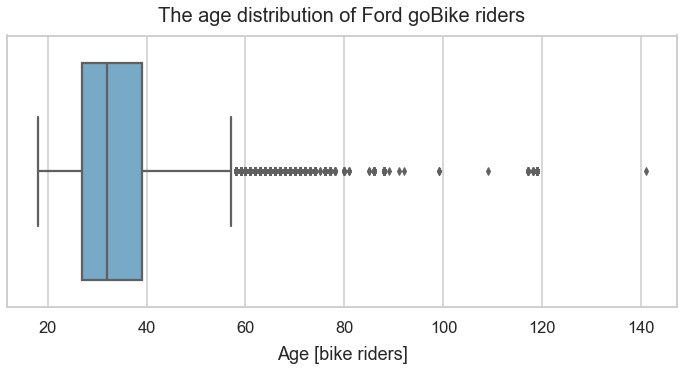

In [100]:
plt.figure(figsize=(12,5))
sb.boxplot(x='age',  data=df, palette='Blues', orient='h')
plt.title("The age distribution of Ford goBike riders", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
# plt.savefig('image01.png');

There are outliers. Age from 18 to 55 takes 95% of the users. So, it's logical to remove users more than 60 years old. There were users more than 100 years old.

In [101]:
df = df[df['age']<=60]
df['age'].mean()

33.523386729824644

The Ford bike users' median user age is around 33~34.

### Working with The most stations trips or with all station  are better?
let's check

In [102]:
# start stations: 
print(len(df['start_station_name'].value_counts()))
df['start_station_name'].value_counts()

329


Market St at 10th St                                         3626
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3314
Berry St at 4th St                                           2880
Montgomery St BART Station (Market St at 2nd St)             2667
Powell St BART Station (Market St at 4th St)                 2568
                                                             ... 
Willow St at Vine St                                            8
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

#### Start stations: there are 329 wirh different trafics.
let's see it visual

329


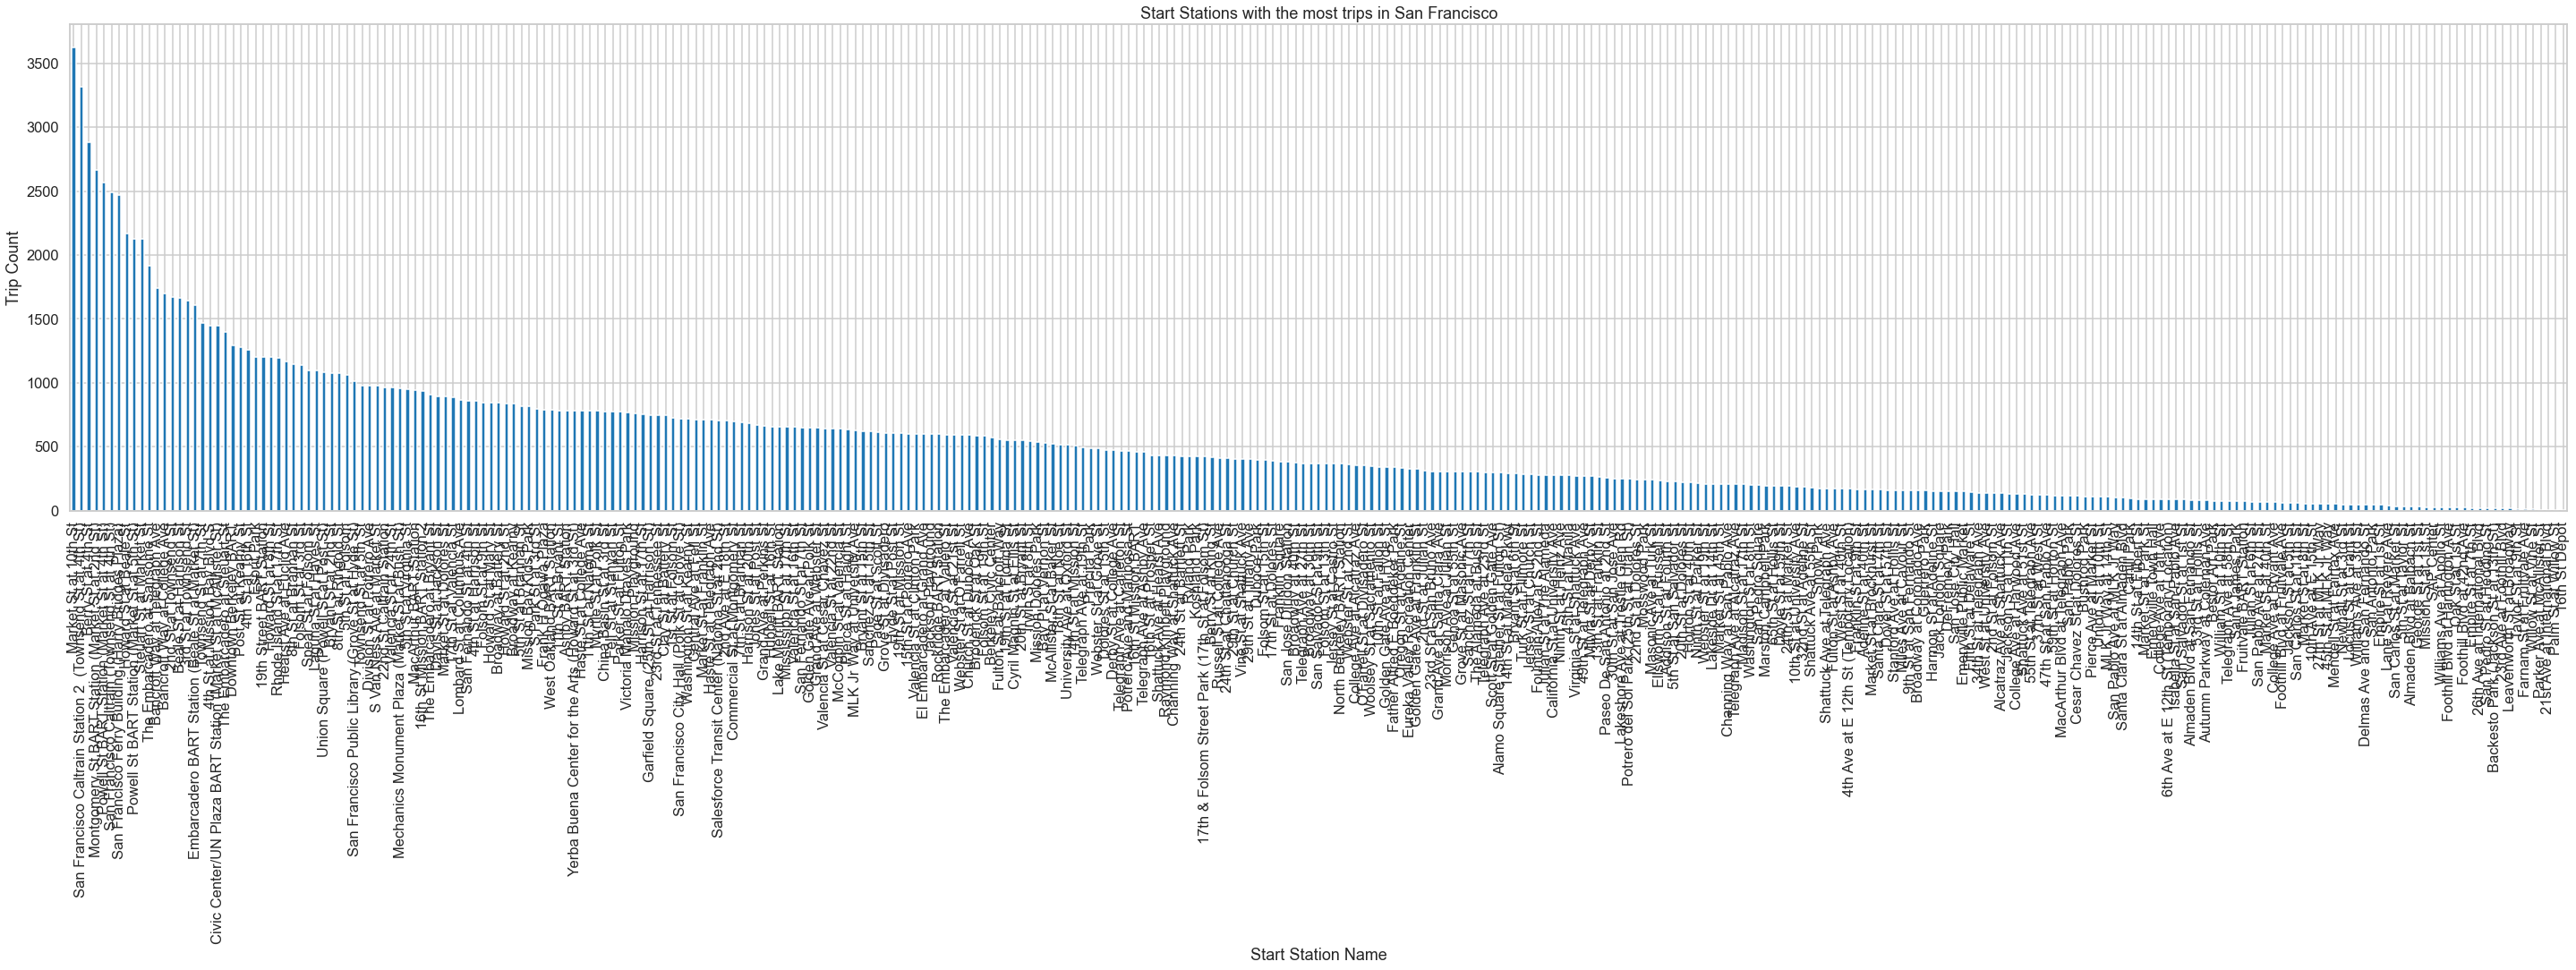

In [103]:
# start stations: there are 329. 
print(len(df['start_station_name'].value_counts()))
fig, ax = plt.subplots(nrows=1, figsize = [50,10])
df['start_station_name'].value_counts().plot(kind='bar')
plt.xlabel('Start Station Name')
plt.ylabel('Trip Count')
plt.title('Start Stations with the most trips in San Francisco');

### What about end station?

In [104]:
# end stations: 
print(len(df['end_station_name'].value_counts()))
df['end_station_name'].value_counts()

329


San Francisco Caltrain Station 2  (Townsend St at 4th St)    4552
Market St at 10th St                                         3676
Montgomery St BART Station (Market St at 2nd St)             3397
San Francisco Ferry Building (Harry Bridges Plaza)           3038
Powell St BART Station (Market St at 4th St)                 2801
                                                             ... 
Foothill Blvd at Harrington Ave                                 8
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  4
Name: end_station_name, Length: 329, dtype: int64

#### end stations: there are 329 with different trafics.
let's see it visual

329


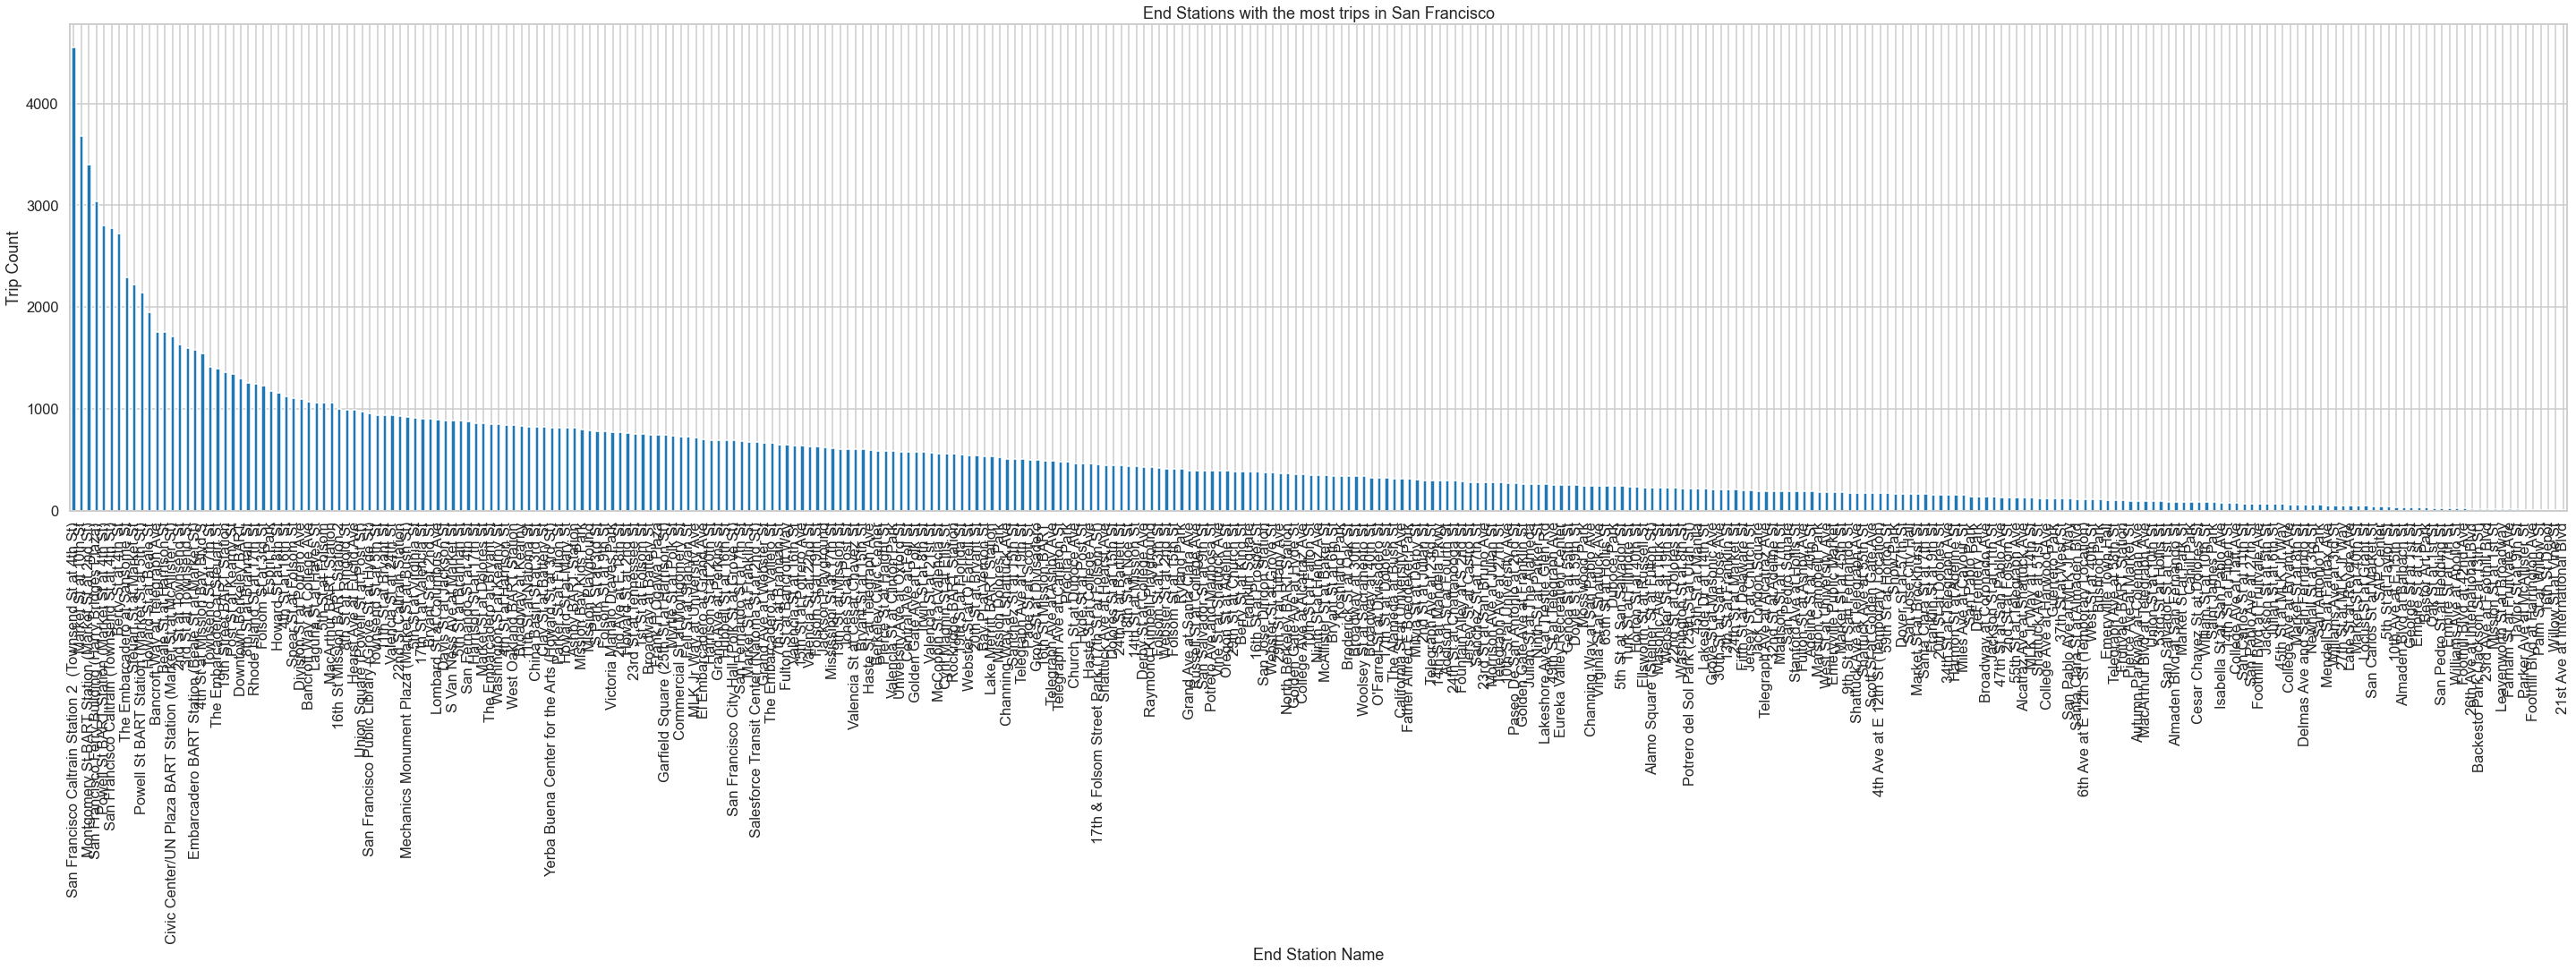

In [105]:
# End stations: 
print(len(df['end_station_name'].value_counts()))
fig, ax = plt.subplots(nrows=1, figsize = [50,10])
df['end_station_name'].value_counts().plot(kind='bar')
plt.xlabel('End Station Name')
plt.ylabel('Trip Count')
plt.title('End Stations with the most trips in San Francisco');

#### From the above 2 chart, the most trips count are  7 start and end stations which is diferent from the other stations  in San Francisco
#### The most trafic station (the first 7 station on the graph) will be used in this invistigation project.
let's select and check this stations

### Subset the dataset by keeping only top 7 locations with high trips

In [106]:
# Subset the dataset by keeping only top 7 locations with high traffics, dftops. 
locs = df['start_station_name'].value_counts().index.tolist()[0:7]
dftops = df.loc[df['start_station_name'].isin(locs)]
dftops['start_station_name'].value_counts()

Market St at 10th St                                         3626
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3314
Berry St at 4th St                                           2880
Montgomery St BART Station (Market St at 2nd St)             2667
Powell St BART Station (Market St at 4th St)                 2568
San Francisco Caltrain (Townsend St at 4th St)               2489
San Francisco Ferry Building (Harry Bridges Plaza)           2467
Name: start_station_name, dtype: int64

In [107]:
StStatn_counts = dftops['start_station_name'].value_counts()
StStatn_order = StStatn_counts.index

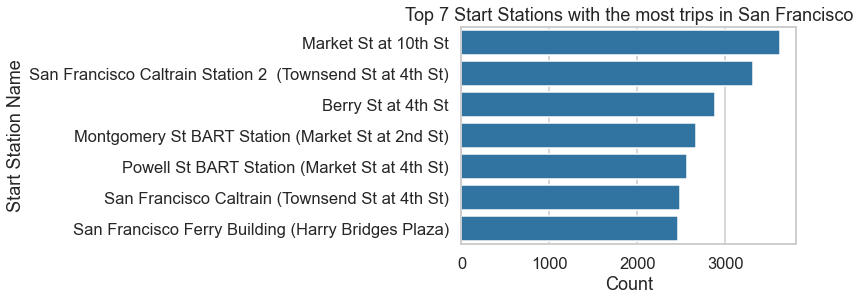

In [108]:
base_color = sb.color_palette()[0]
sb.countplot(data=dftops, y='start_station_name', color=base_color, order=StStatn_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 7 Start Stations with the most trips in San Francisco');


In [109]:
# Subset the dataset by keeping only top 7 locations with high traffics end stations, dftope. 
loce = df['end_station_name'].value_counts().index.tolist()[0:7]
dftope = df.loc[df['end_station_name'].isin(loce)]
dftope['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4552
Market St at 10th St                                         3676
Montgomery St BART Station (Market St at 2nd St)             3397
San Francisco Ferry Building (Harry Bridges Plaza)           3038
Powell St BART Station (Market St at 4th St)                 2801
San Francisco Caltrain (Townsend St at 4th St)               2771
Berry St at 4th St                                           2724
Name: end_station_name, dtype: int64

In [110]:
EdStatn_counts = dftope['end_station_name'].value_counts()
EdStatn_order = EdStatn_counts.index

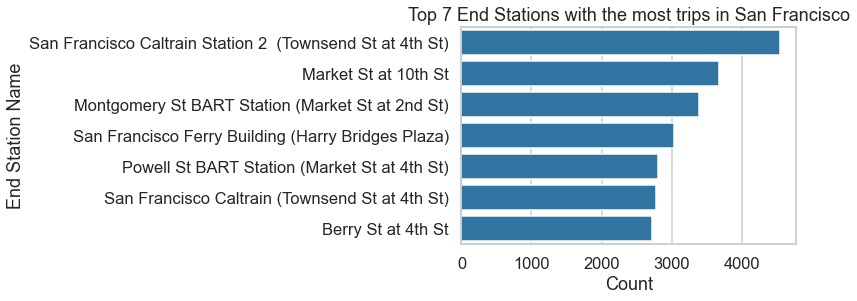

In [111]:
base_color = sb.color_palette()[0]
sb.countplot(data=dftope, y='end_station_name', color=base_color, order=EdStatn_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 7 End Stations with the most trips in San Francisco');

## Where and Why most trips are taken?

### After checking the top (most trips) 7 start and end stations in San Francisco are taken becouse this most stations were connect to public transportations such as CalTrain, Metro (Berry) stations , Ferry building and Market Street.
### The top (most trips) 7 start and end stations are looks like the same,
### So the invistigation will be on the top 7 start station which are the most interested in the most traffic locations with over 2,500 trips:      
<li>Market St at 10th St
<li>San Francisco Caltrain Station 2 (Townsend St at 4th St)
<li>Berry St at 4th St
<li>Montgomery St BART Station (Market St at 2nd St)
<li>Powell St BART Station (Market St at 4th St)
<li>San Francisco Ferry Building (Harry Bridges Plaza)
<li>San Francisco Caltrain (Townsend St at 4th St)

<a id='vis'></a>
# Visualizing Data

<a id='uni'></a>
## Univariate Exploration¶

## When the most trips are taken?¶

#### by looking into the start time and start location of this dataset.

## Time: 
#### The distribution of  time of day, weekday after subsetting, regenerate:

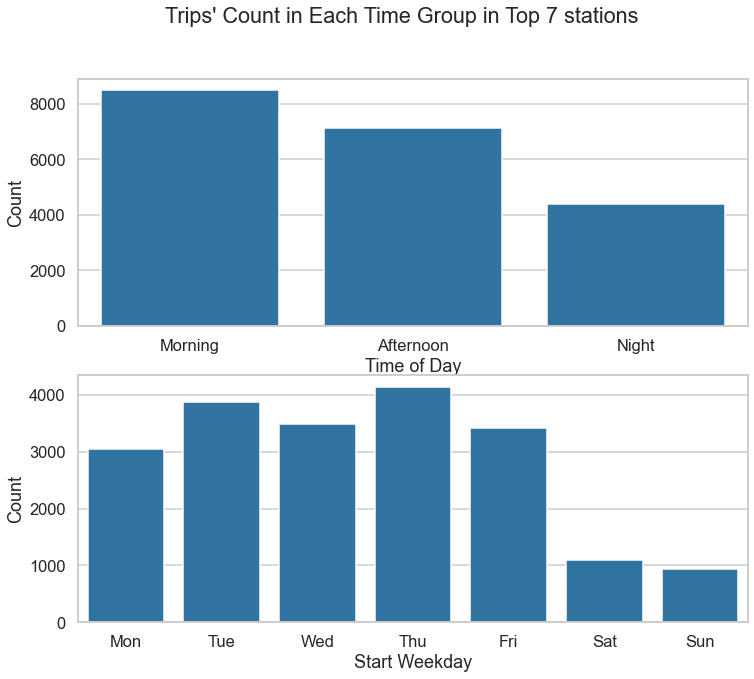

In [112]:
fig, ax = plt.subplots(nrows=2, figsize = [12,10])
default_color = sb.color_palette()[0]
sb.countplot(data = dftops, x = 'period_day', color = default_color, ax = ax[0])
sb.countplot(data = dftops, x = 'start_weekday_char', color = default_color, ax = ax[1])
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Start Weekday')
ax[1].set_ylabel('Count')
fig.suptitle('Trips\' Count in Each Time Group in Top 7 stations');

#### In these top 7 trips stations, base on the above figures, we found:
<LI>During the day, there are more trips in the morning and afternoon than the night. It probably because of rush hours. Also, the number of trips in the afternoon is slightly less than the morning and beger than night. may be bick riders go in the morning and come back home in afternoon, and might not be back in the night.
<LI>It makes sense that there are more trips during the weekdays and less trips during the weekends because of working schedule.

## The  Duration of trips Distribution

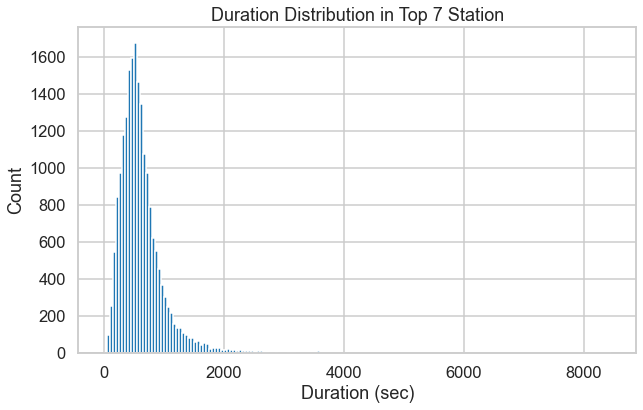

In [113]:
# The distribution of duration of trips
plt.figure(figsize=(10,6))
bins = np.arange(0, 8500, 50)
plt.hist(data=dftops, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution in Top 7 Station');


#### Long tail in the distribution

In [114]:
dftops['duration_sec'].describe()

count    20011.000000
mean       717.341562
std       1733.953993
min         61.000000
25%        393.000000
50%        551.000000
75%        758.000000
max      84548.000000
Name: duration_sec, dtype: float64

#### there's a long tail in the distribution, so let's put it on a log scale instead

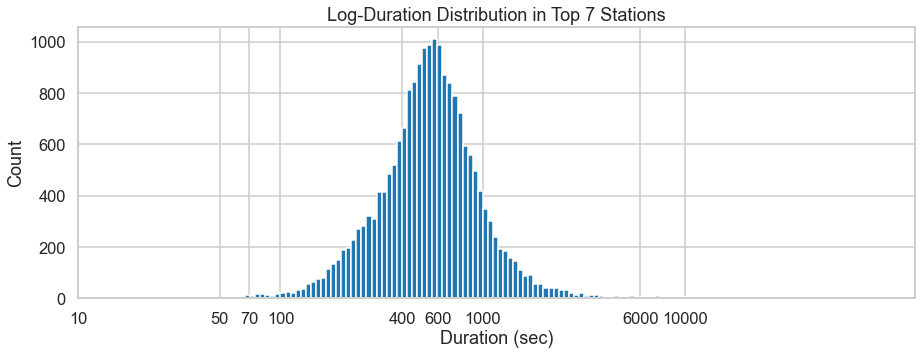

In [115]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(dftops['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = dftops, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,400,600,1000,6000,10000], [10,50,70,100,400,600,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Log-Duration Distribution in Top 7 Stations');

#### From the figure, most durations of trips fall into 600 seconds (10.0 minutes). It looks normally distributed.

## The Relationship between user features and the most trips are taken features:¶

## User's characteristics:
### the distributions of user type and gender


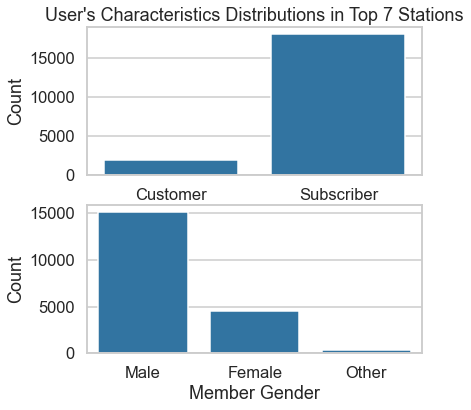

In [116]:
# User's characteristics: the distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [6,6])
default_color = sb.color_palette()[0]
sb.countplot(data = dftops, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = dftops, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('User\'s Characteristics Distributions in Top 7 Stations');


#### In these top 7 trips stations, base on the above figures, we found:
<li>From priveise notes in Time Group, makes sense that the user is using bick every day and the top trips around the public transportion, so we found more subscribers than customers.becouse subscribers is low in cost.
<li>For the gender groups, the number of trips in male users is 4 times more than the number of trips in females.
<li>There are few bick users with 'Other' gender. It's not clear that the bick users are not willing to reveal or there are data entry issues, we will keep them in the dataset..

## Age: based on the distribution

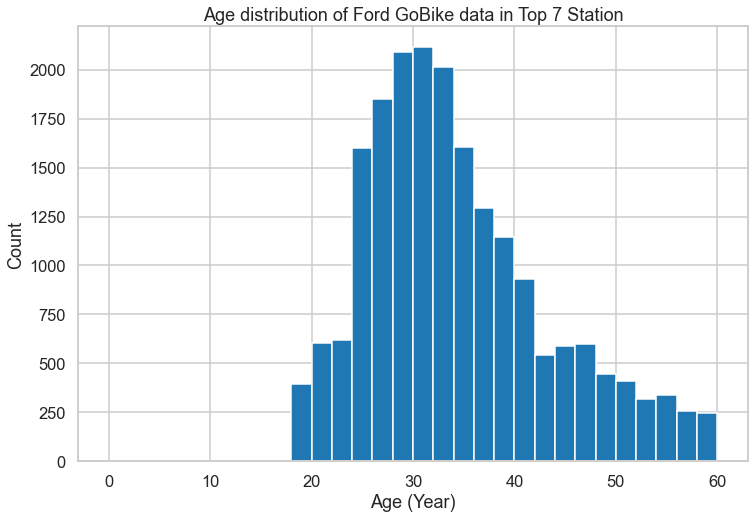

In [117]:
# Age: based on the distribution
plt.figure(figsize=(12,8))
bins = np.arange(0, dftops['age'].max()+2, 2)
plt.hist(data=dftops, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike data in Top 7 Station');

 #### It's right skewed.

In [118]:
dftops['age'].describe()

count    20011.000000
mean        33.971766
std          8.998803
min         18.000000
25%         27.000000
50%         32.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

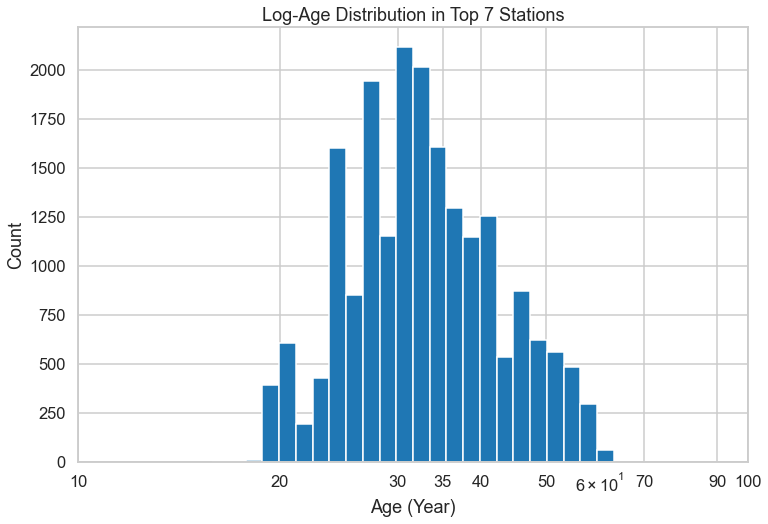

In [119]:
# there's a long tail in the distribution, so let's put it on a log scale instead
logbinsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(dftops['age'].max())+logbinsize, logbinsize)
plt.figure(figsize=[12, 8])
plt.hist(data = dftops, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('Log-Age Distribution in Top 7 Stations');


#### From the figure, most of bick users are around 30 years old. Even though there are some bick users ages older than 90 years old looks like high outliers, we will keep them in the dataset.

### Transformations
The variables, age and duration_sec, have different types of <B>skew</B>, by using log transformat to be like <B>Normal Distribution</B>,
<li>age's data has one big peak between 25 and 40 years old and some small peak. 
<li>Duration's data have one peak between 550 and 650 seconds.

<a id='bi'></a>
## Bivariate Exploration¶

In [120]:
# Prepare lists of numeric variables and categorical variables
numeric_vars = ['age','duration_sec']
times_chr = ['period_day','start_weekday_char']
users_chr = ['user_type','member_gender']

In [121]:
# Order top 7 stations from the number one (most trips) to the number seven (least trips)
loc_cl = locs 
loc_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=loc_cl)
dftops['start_station_name'] = dftops['start_station_name'].astype(loc_cl2)

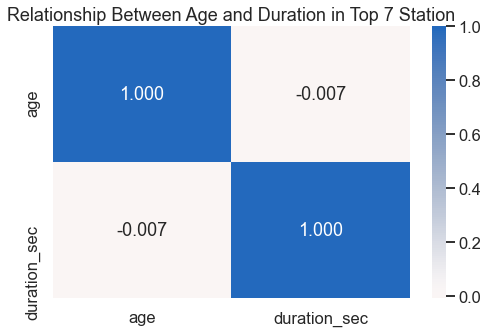

In [122]:
# Numeric variables: correlation between age and duration second
plt.figure(figsize = [8, 5])
sb.heatmap(dftops[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration in Top 7 Station');

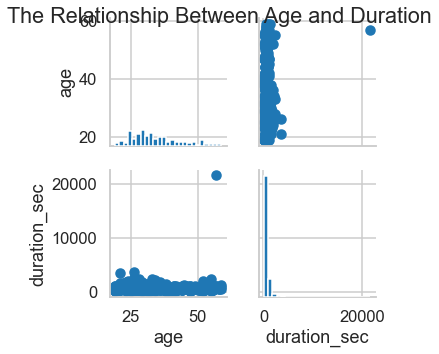

In [123]:
# plot matrix for age and duration: sample 500 so that plots are clearer. 
ss = np.random.choice(dftops.shape[0], 500, replace = False)

dftops_samp = dftops.iloc[ss,:]

g = sb.PairGrid(data = dftops_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 25)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');

Based on the correlation, age is slightly negative correlated with duration, ie. age and duration is negatively correlated. in this dataset, the major population of age is between 30 and 40 years old and  We have less samples in the older population.

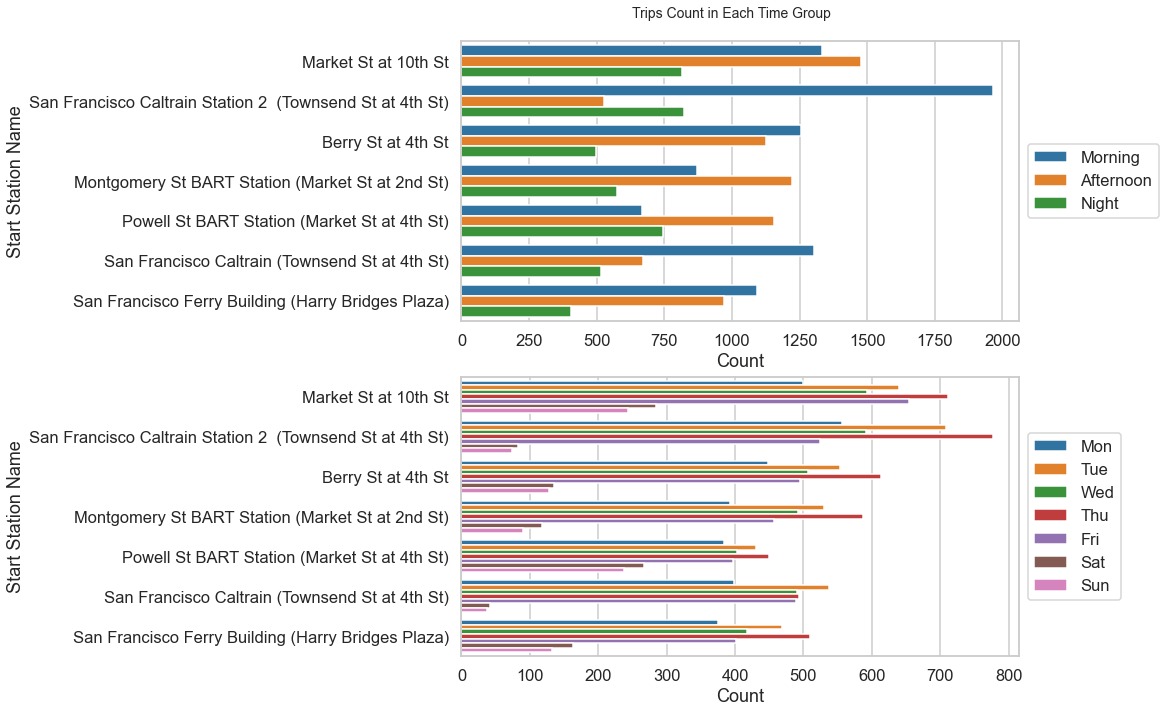

In [124]:
# 2. Categorical variables by plotting countplot: top 7 stations by times (time of day, weekdays)
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(3, 1, i)
    sb.countplot(data=dftops, y='start_station_name', hue=times_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

#### After breaking down into each station,

<li>Time of day: morning is not necessary the period of time with most trips. 4 stations have the most trips during the morning and another 3 stations has the most trips during the afternoon. It needs to be investigated more.
<li>Day of week: weekdays (Monday, Tuesday, Wednesday, Thursday and Friday) have the most trips than weekends. Compared to other weekdays, Sunday has less trips and  Some stations' weekends have more trips than other stations (even their trips are still less than weekdays') might because these stations are close to tourist attractions. But all of points need to be taken a deeper look.

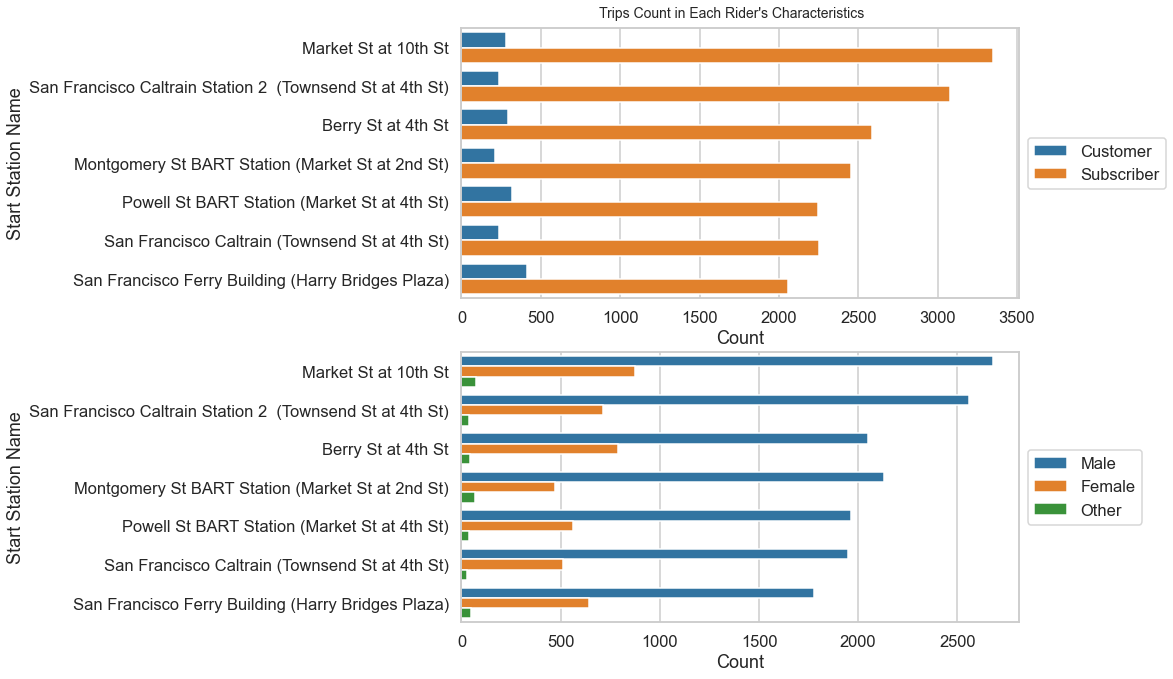

In [125]:
# Categorical variables by plotting countplot: top 7 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s Characteristics' , fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=dftops, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');


After breaking down into top 7 station by users' attributes:

Apparently, subscribers are more than customers in each station. However, there are more customers at San Francisco Ferry Building (Harry Bridges Plaza). Customers might include tourists.
The trips in male users are way more than in females. Even though I look into the gender distribution in SF. It cannot explain why males users are more. It needs to be investigated deeper.

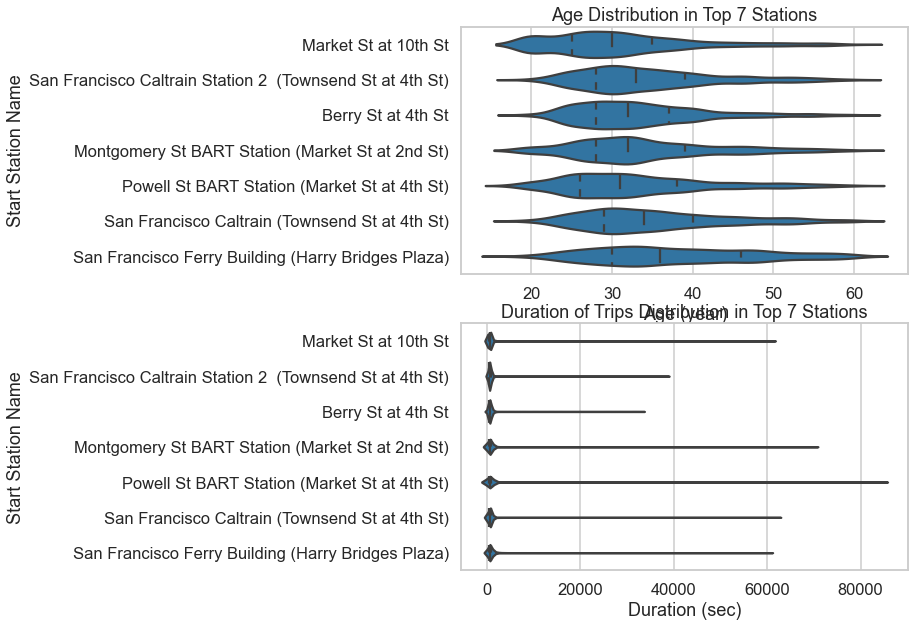

In [126]:
# Numeric variables by plotting violin plot to see the distributions: 
# Top 7 stations by age, Top 7 stations by duration of trips
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=dftops, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xlabel('Age (year)')
plt.ylabel('Start Station Name')
plt.title('Age Distribution in Top 7 Stations')

ax = plt.subplot(212)
sb.violinplot(data=dftops, y='start_station_name', x='duration_sec', inner='quartile',color=base_color)
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution in Top 7 Stations');


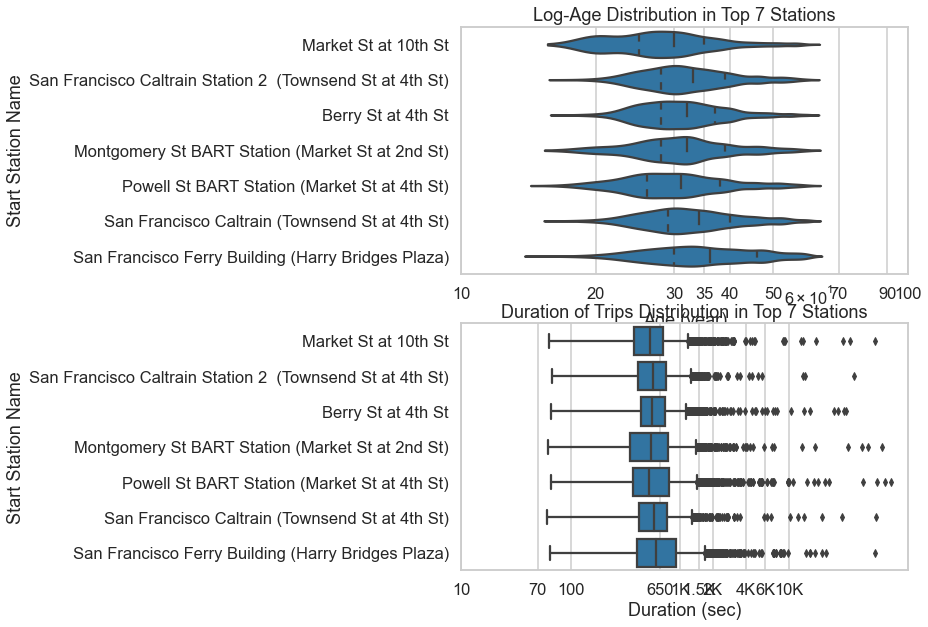

In [127]:
# It looks like the majority of data squeeze in the first half of plots. Let's see log transform.
# For duration of trips: avoid messiness of violin plots, we plot boxplots instead.
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=dftops, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.ylabel('Start Station Name')
plt.xlabel('Age (year)')
plt.title('Log-Age Distribution in Top 7 Stations')

ax = plt.subplot(212)
sb.boxplot(data=dftops, y='start_station_name', x='duration_sec',color=base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution in Top 7 Stations');

In [128]:
# Check high outliers in duration of trips
len(dftops.query('duration_sec > 1500')['duration_sec'])/len(dftops['duration_sec'])

0.04072759982009894

After log-transformed, most of median age population (between 30 to 40) is consistent in each station. The median of duration (second) falls around 650 second. However, after 1500 second, there are a lot of high outliers around 4.5%.

### Observed relationships in bivariate exploration.

In the top 7 stations, look into the attributes' times and users:

1.Time:
<li>After separating into 7 stations, there are more trips in the morning and afternoon than the night. the number of trips in the afternoon is slightly less than the morning and beger than night.
<li>TIt makes sense that there are more trips during the weekdays and less trips during the weekends because of working schedule.

2.User:
<li>Age: most of age population falls between 30 and 40 years old. It might imply there are full time employees and commuters.
<li>Gender: the number of trips in males is way more than the number in females. It needs to be investigated more.
<li>Subscribe: the number of trips in subscribers is more than the number in customers because of pricing and population.

<a id='mult'></a>
## Multivariate Exploration¶

The most interesting variables are in locations and time with most trips. Now, we 'll study the effects ans trends after adding third or more variables.

In [129]:
# Top 7 trip stations by times: separate user types and take a look customers and subscribers individually
df_cust = dftops.query('user_type == "Customer"')
df_sub = dftops.query('user_type == "Subscriber"')

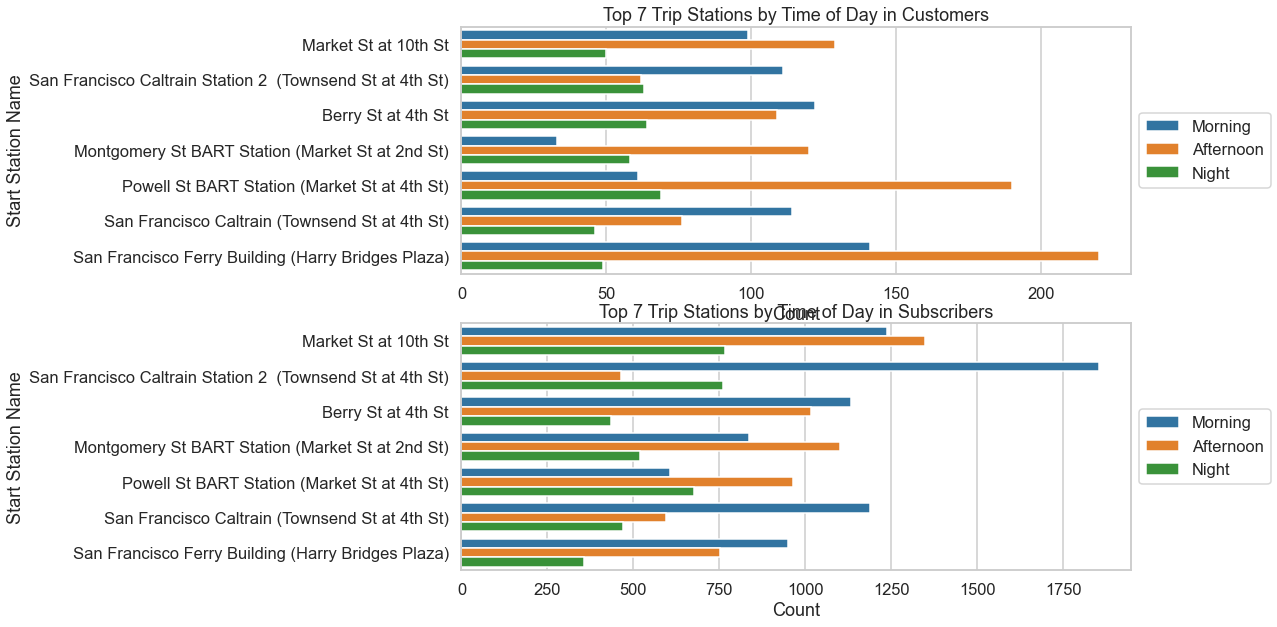

In [130]:
# 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

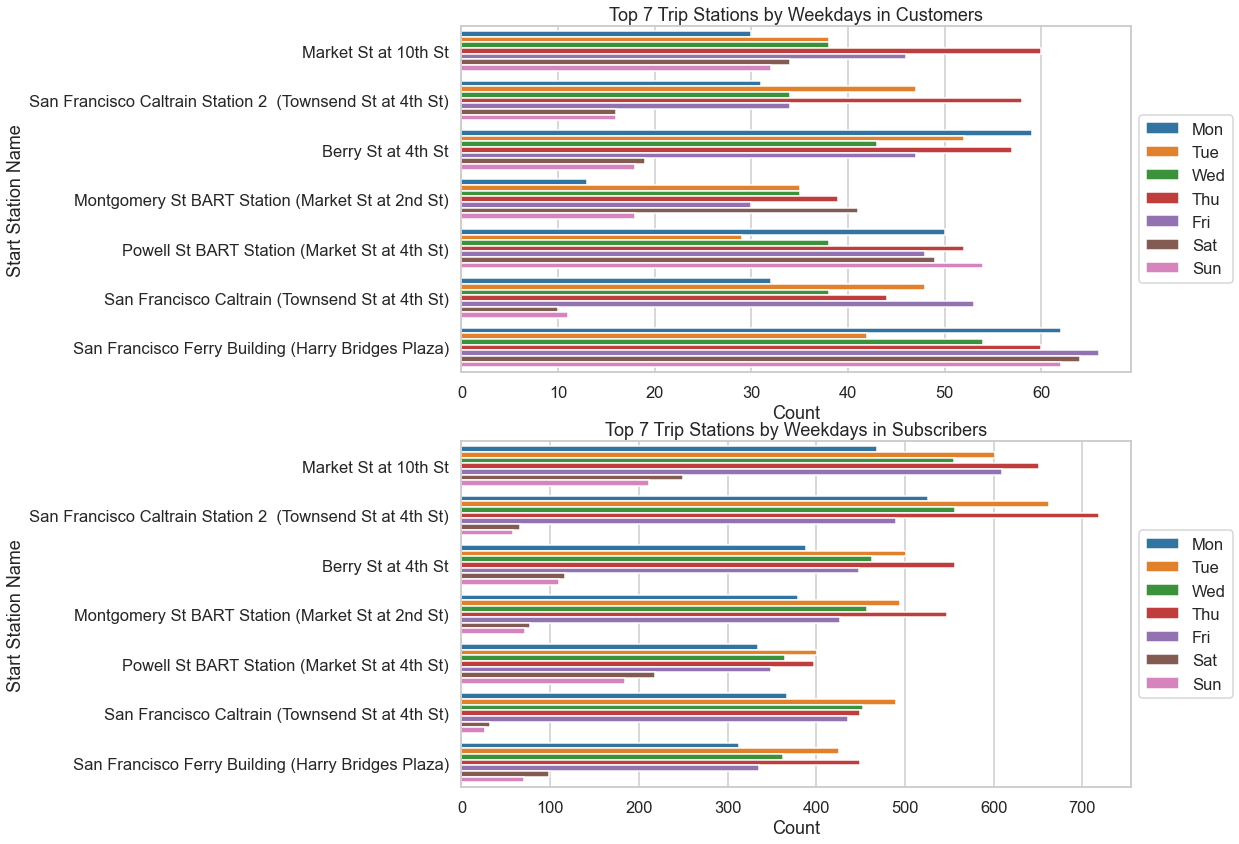

In [131]:
# 3 categorical variables using countplot: Weekday between customers and subscribers
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekdays in Customers')
plt.ylabel('Start Station Name')
plt.xlabel('Count')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekdays in Subscribers')
plt.ylabel('Start Station Name')
plt.xlabel('Count');

After separating customers from subscribers, there are some very interesting findings in these 3 time categorical variables.

<li>Time of Day: there are more trips in the morning or afternoon no matter in customers or subscribers.
<li>Weekdays: it implies customers probably includes tourists because most trips happen in the weekend. On the other hand, subscribers imply commuters because most trips happen in the weekdays.

In [132]:
# Let's take a look at gender groups in time and locations
df_f = dftops.query('member_gender == "Female"')
df_m = dftops.query('member_gender == "Male"')

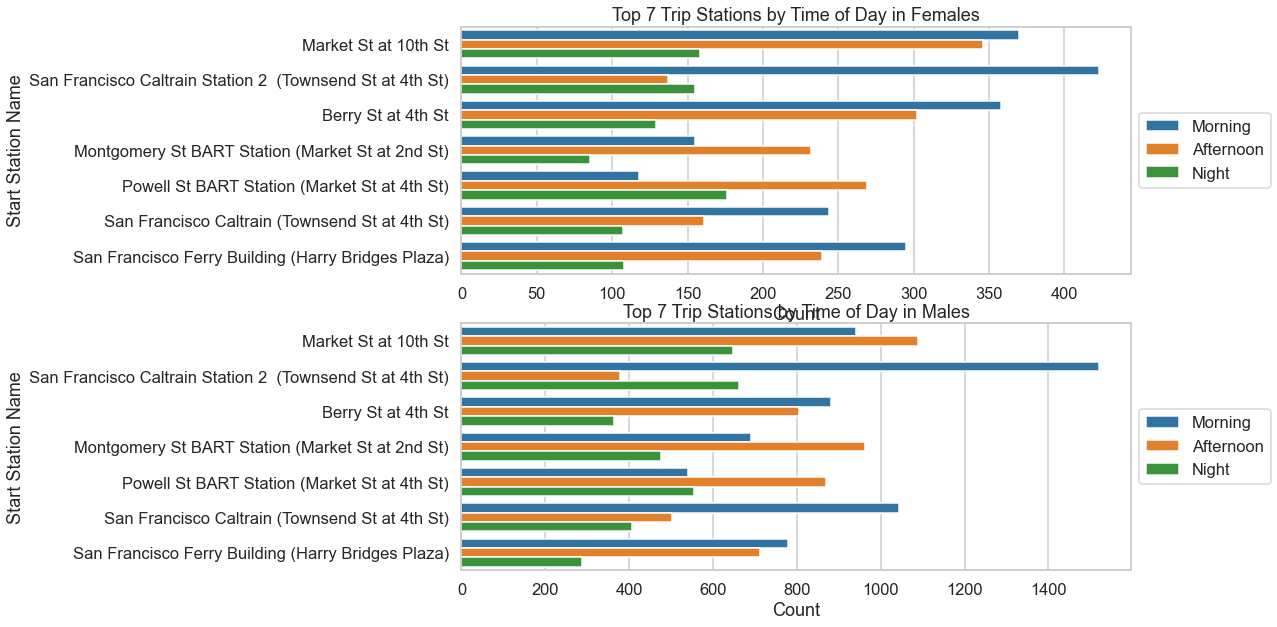

In [133]:
# Top 7 trip stations by times in each gender
# 3 categorical variables using countplot: Time of day
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Time of Day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

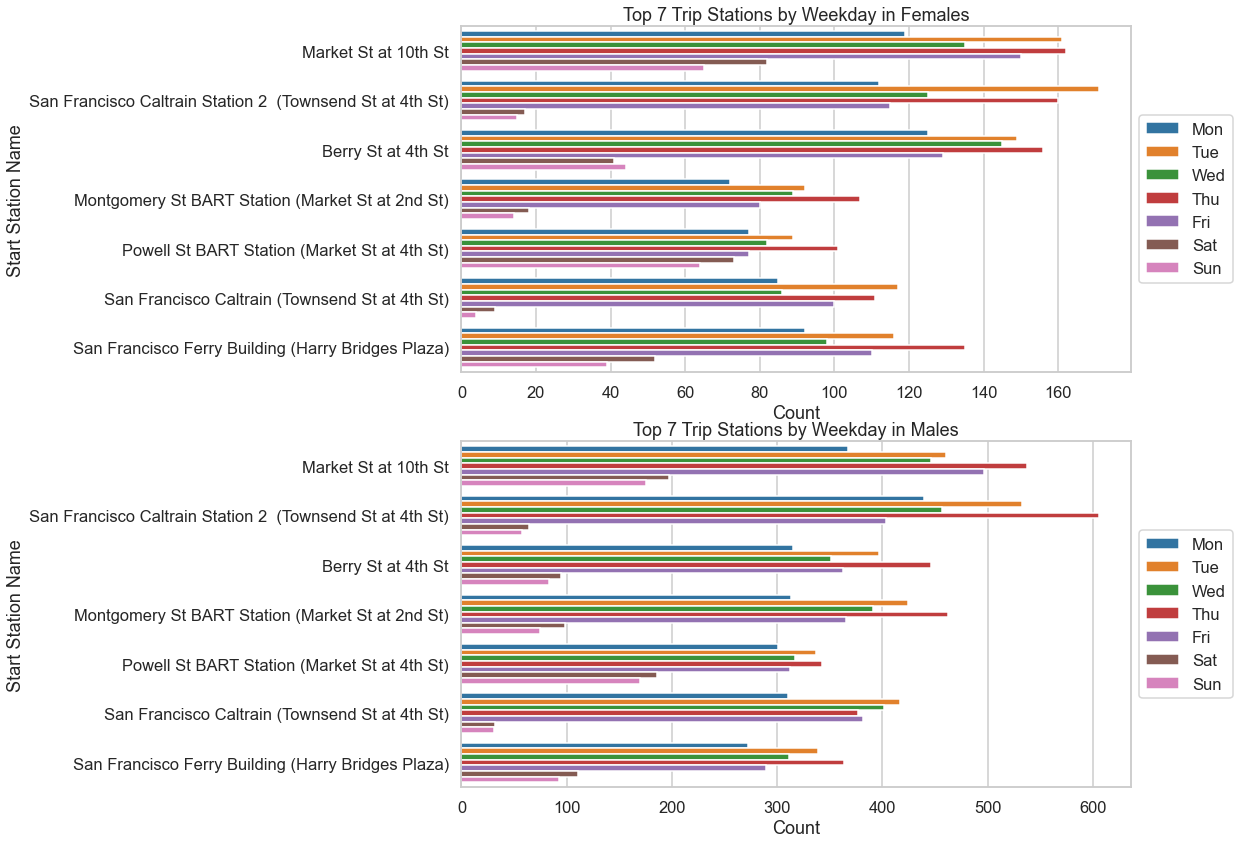

In [134]:
#  3 categorical variables using countplot: Weekday
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_f, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekday in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(212)
sb.countplot(data=df_m, y='start_station_name', hue='start_weekday_char')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 7 Trip Stations by Weekday in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

After checking time of day and weekdays, 
females have most trips in the morning
it is hard to tell any distinct trends between females and males. It needs to be investigated deeper and get more information.

In [135]:
# Station names are a little bit too long. Use station id instead for FacetGrid plots.
dftops.groupby('start_station_name')['start_station_id'].value_counts()

start_station_name                                         start_station_id
Market St at 10th St                                       58.0                3626
San Francisco Caltrain Station 2  (Townsend St at 4th St)  67.0                3314
Berry St at 4th St                                         81.0                2880
Montgomery St BART Station (Market St at 2nd St)           21.0                2667
Powell St BART Station (Market St at 4th St)               3.0                 2568
San Francisco Caltrain (Townsend St at 4th St)             30.0                2489
San Francisco Ferry Building (Harry Bridges Plaza)         15.0                2467
Name: start_station_id, dtype: int64

### in Top 7 trips station by times (time of day, weekdays),<br>3 Categorical variables and 1 numeric variable: too many groups here, So separate them by using FacetGrid with:

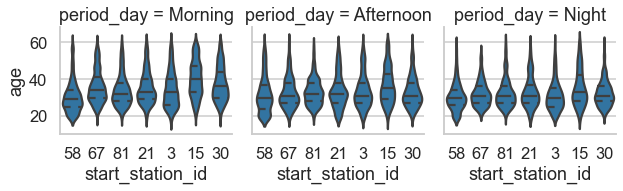

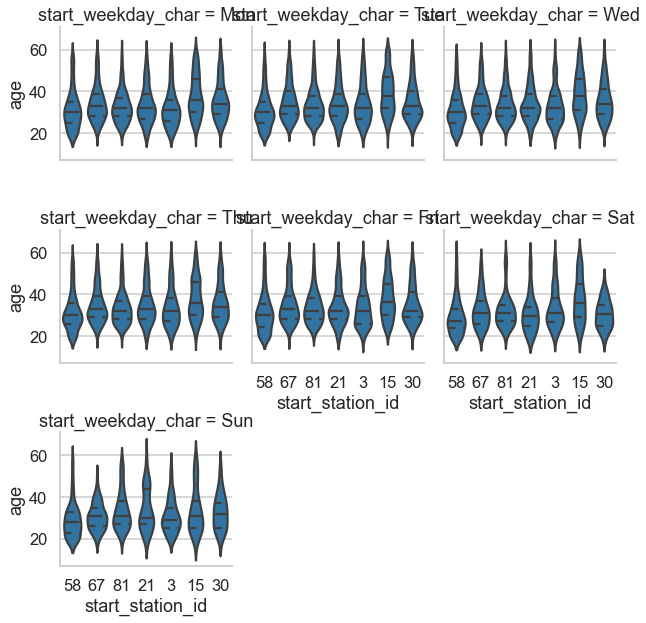

In [136]:
# in Violin age distribution plot
for i in range(1, 3):
    g = sb.FacetGrid(data=dftops, col=times_chr[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id', 'age', inner='quartile', order=[58,67,81,21,3,15,30], color=base_color);

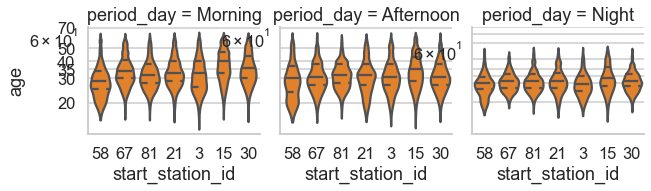

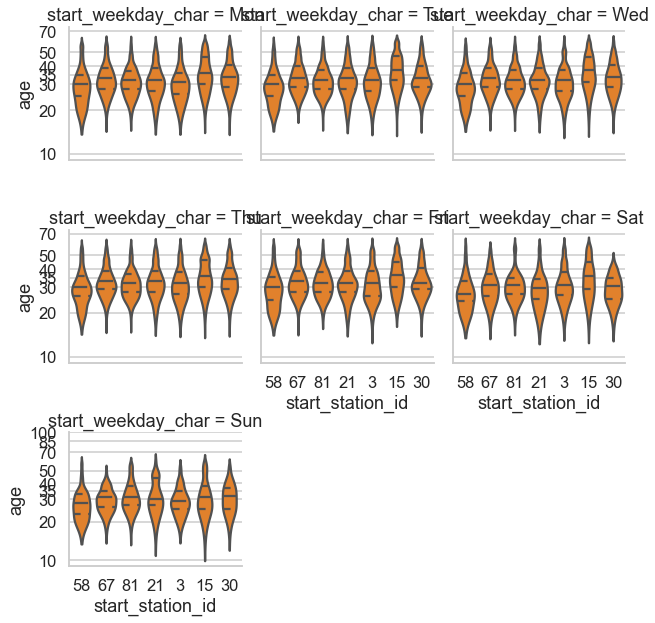

In [137]:
# in log-transformed age distribution
base_color = sb.color_palette()[1]
for i in range(1, 3):
    g = sb.FacetGrid(data=dftops, col=times_chr[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id', 'age', inner='quartile', order=[58,67,81,21,3,15,30], color=base_color)
    plt.yscale('log')
    plt.yticks([10,20,30,35,40,50,70,85,100], [10,20,30,35,40,50,70,85,100]);

In the age distribution, there are not big different in time and locations. Most medians of age fall between 30 and 40 years old.

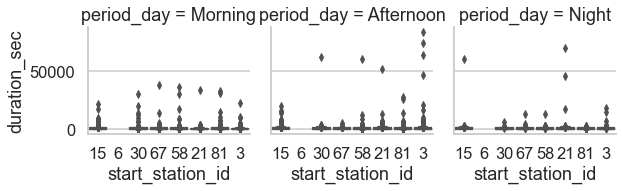

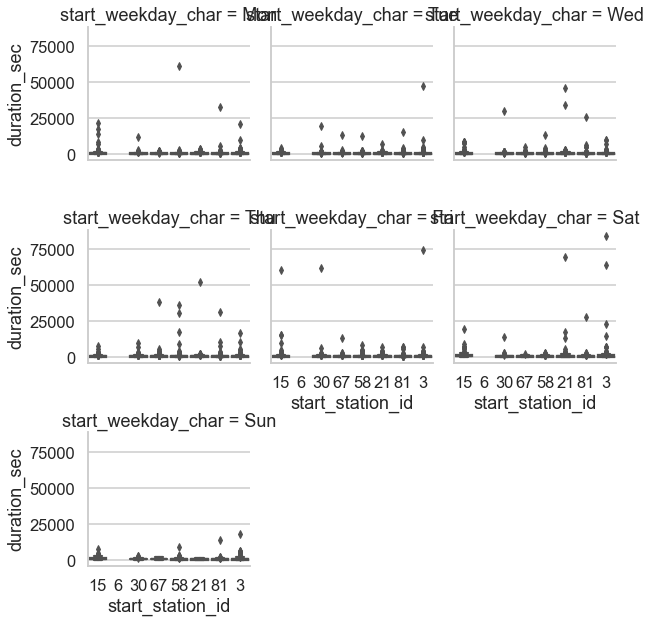

In [138]:
# with Boxplot
# Top 7 trips station by times (time of day, weekdays) in duration of trips distribution
base_color = sb.color_palette()[1]
for i in range(1, 3):
    g = sb.FacetGrid(data=dftops, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color);

### Can't observe the trends based on the above plots because they all sequeeze together. So, let's see log-transformed for duration of trips

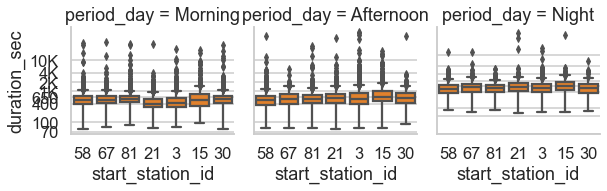

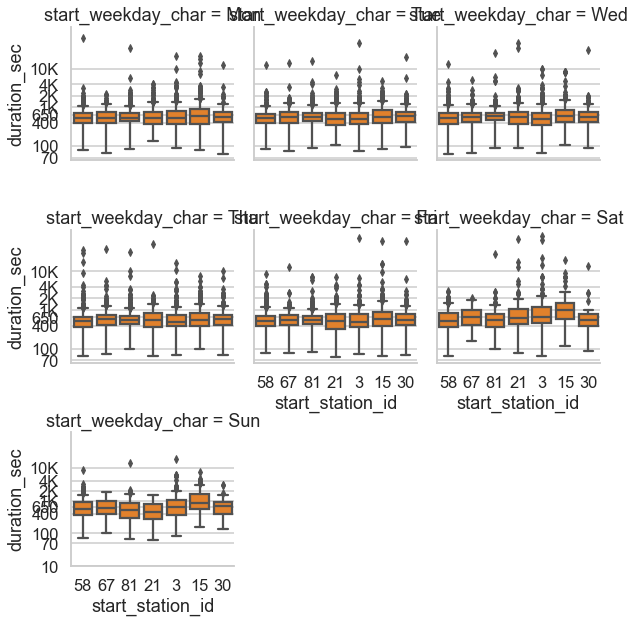

In [139]:
# Top 7 trips station by times (period of day, weekdayss) in log-transformed duration of trips distribution
base_color = sb.color_palette()[1]
for i in range(1, 3):
    g = sb.FacetGrid(data=dftops, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[58,67,81,21,3,15,30], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

After log transformed, the trips are longer at night, on Saturday and on Sunday.
let's test user types and the duration of trips impact.

<Figure size 432x288 with 0 Axes>

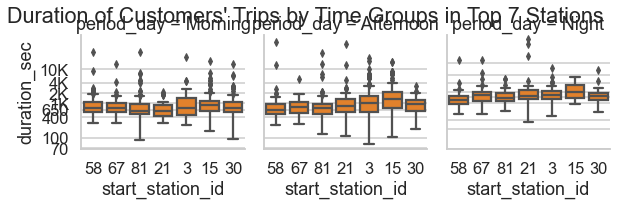

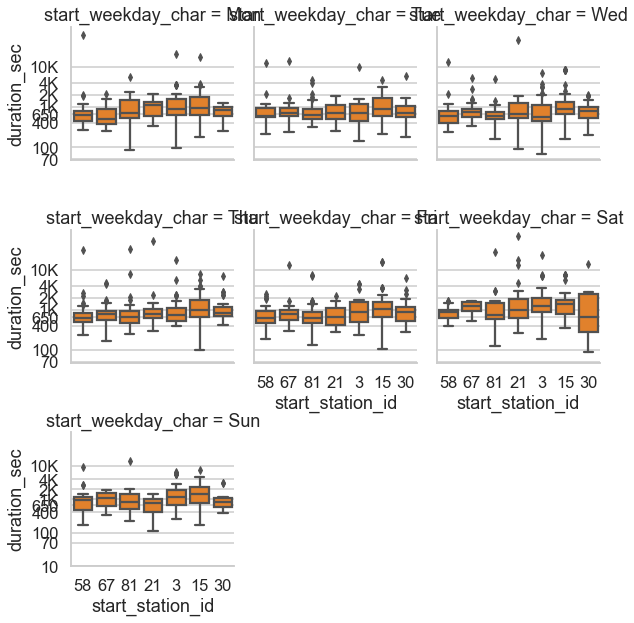

In [140]:
# Top 7 trips station by times(time of day, weekdays) in log-transformed duration of trips distribution and in customers
# usong Boxplot
base_color = sb.color_palette()[1]
for i in range(1, 3):
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Duration of Customers\' Trips by Time Groups in Top 7 Stations')
    g = sb.FacetGrid(data=df_cust, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[58,67,81,21,3,15,30], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

After separating subscribers from customers, the median of duration of trips in customers is between 600 and 1000 seconds. The trips at morning are longer.

<Figure size 432x288 with 0 Axes>

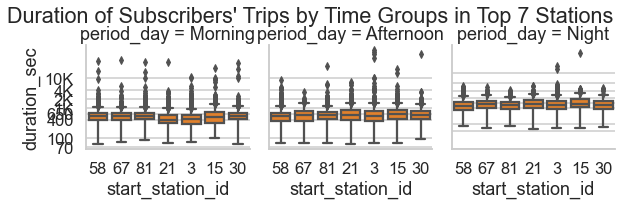

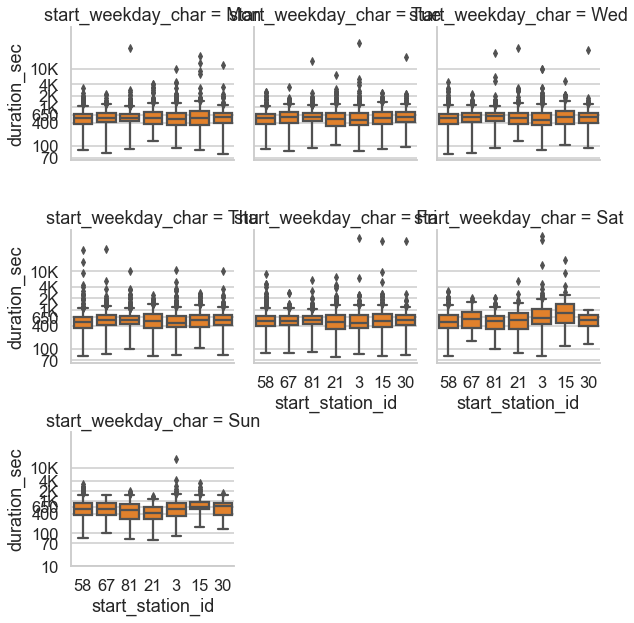

In [141]:
# in log-transformed duration of trips distribution and in subscribers
base_color = sb.color_palette()[1]

for i in range(1, 3):
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('Duration of Subscribers\' Trips by Time Groups in Top 7 Stations')
    g = sb.FacetGrid(data=df_sub, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[58,67,81,21,3,15,30], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);


After separating subscribers from customers, the median of duration of trips in customers is between 600 and 1000 seconds. The trips at afternoon are longer.

### Features strengthen each other in terms of looking at locations and times
Separating user types, customers and subscribers, displays more information from location and time. Customers might be tourists who like to use a bike during the weekend. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays and afternoon.

In [142]:
!jupyter nbconvert exploration.ipynb --to html

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook exploration.ipynb to html
[NbConvertApp] Writing 4622929 bytes to exploration.html


In [143]:
#!jupyter nbconvert exploration.ipynb --to slides --post serve --template output_toggle
!jupyter nbconvert exploration.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook exploration.ipynb to slides
[NbConvertApp] Writing 4498580 bytes to exploration.slides.html
